# Forecasting passenger traffic challenge from HackerRank

This notebook is used to solve the 'Forecasting passenger traffic' challenge of the Artificial Intelligence module fo HackerRank. To check this challenge, go to https://www.hackerrank.com/challenges/forecasting-passenger-traffic/problem.

Therefore, the objective of this notebook is to forecast an airport total passenger monthly count for the next 12 months given an airport's total monthly passenger counts for a period of N previous months.

The notebook is dividede as follows:
    
1. Data exploration
2. Data modelling and forecasting

## Data exploration

In this section, we explore the characteristics of the dataset, including its dimensions and characteristics of its variables.

In [19]:
import pandas as pd
import numpy as np
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in ./opt/anaconda3/lib/python3.8/site-packages (0.24.2)


In [2]:
df = pd.read_csv('/Users/leuzinger/Dropbox/Data Science/HackerRank/forecasting-passenger-traffic-testcases/input/input00.txt',delimiter = "\t")
df.reset_index(inplace=True)
df.head()

,index,60
0,MonthNum_1,1226800
1,MonthNum_2,926891
2,MonthNum_3,782725
3,MonthNum_4,1023038
4,MonthNum_5,1126293


In [3]:
df.rename(columns={"index": "Month", "60": "passenger_count"},inplace=True)
df.index = np.arange(1, len(df) + 1)
df.head()

,Month,passenger_count
1,MonthNum_1,1226800
2,MonthNum_2,926891
3,MonthNum_3,782725
4,MonthNum_4,1023038
5,MonthNum_5,1126293


In [118]:
from datetime import datetime, timedelta
from collections import OrderedDict

df_date = df.copy()

# Sample start and end dates
start = datetime(year=2000, month=1, day=1)
end = datetime(year=2006, month=1, day=1)

# Get list of months >= start and < end

months_ = OrderedDict(((start + timedelta(_)).strftime("%Y-%m-01"), 0) for _ in range((end - start).days))
months_list = list(months_.items())
months=[]
months = [months[0] for months in months_list]

for i in range(60):
    month_str = months[i]
    #date_time_month = datetime.strptime(month_str, '%Y-%m-%d').date()
    #df_date.iloc[i,0] = date_time_month
    df_date.iloc[i,0] = month_str
df_date.head()    

,Month,passenger_count
1,2000-01-01,1226800
2,2000-02-01,926891
3,2000-03-01,782725
4,2000-04-01,1023038
5,2000-05-01,1126293


In [92]:
print(df.dtypes)
print(df.shape)

Month              object
passenger_count     int64
dtype: object
(60, 2)


The dataset contains only two columns and 60 lines.

The first column of the dataset contains strings denoting the month number and the second column cotains integers denoting the number of passengers for that month.

### Data vizualization

"The first thing to do in any data analysis task is to plot the data because they enable many features of the data to be visualised, including patterns, unusual observations, changes over time, and relationships between variables" (HYNDMAN; ATHANASOPOULOS, 2018).

Therefore, we will start our analysis making some graphics that are useful for understanding timeseries. The obvious graph to start is a time plot.

The time plot shows that there is considerable varation from one month to the next. However, there does not seem to be a clear trend. Besides, the number of passengers per month does not seem to be affected by seasonal (fluctuations with a fixed frequency) factors. Nonetheless, the time series seems to be cyclic (fluctuations without a fixed frequency).

Next, we check for seasonal patterns. The seasonal plot and seasonal polar plot confirm that there is no seasonality in the data considering the same months year by year.

Besides, we also need to look for autocorrelation in the dataset. From the autocorrelation function (ACF) plot, we see that values for the ACF are within 95% confidence interval (represented by the solid gray line) for lags > 0, which verifies that our data doesn’t have any autocorrelation. This is also confirmed by the partial autocorrelation function (PACF). Therefore, we can consider our time series can be considered **white noise**.

[]

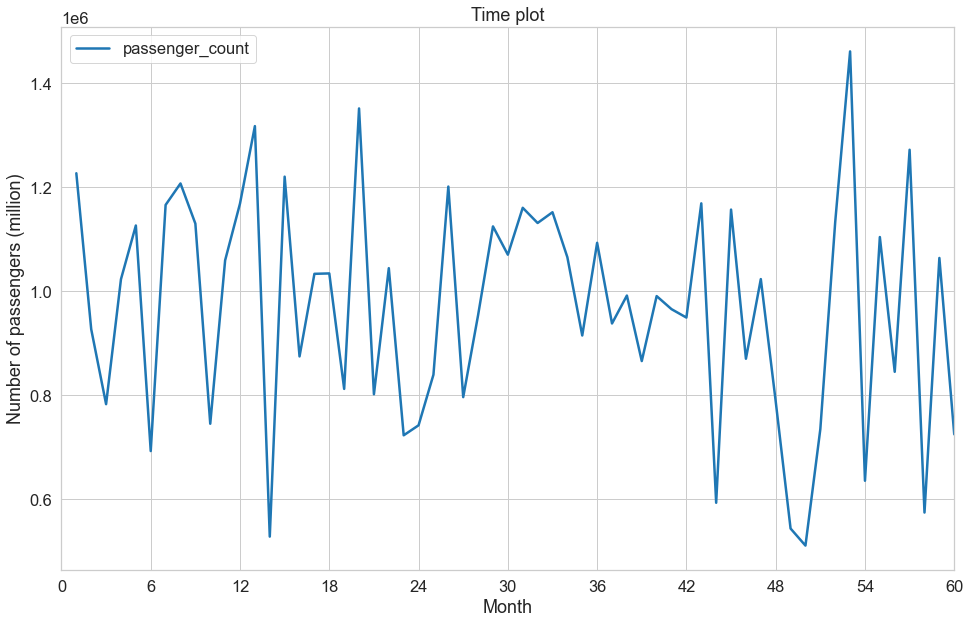

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

time_plot = df_date
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(data=time_plot)
ax.set(xlabel='Month', ylabel = 'Number of passengers (million)')
ax.set_title('Time plot')
ax.set_xlim(1,60)
ax.set_xticks(np.arange(0, 60 + 1, 6))
plt.plot()

In [101]:
df_seasonal = pd.DataFrame(columns=np.arange(1, 12 + 1),index = ['year 1','year 2','year 3','year 4','year 5'])
for i in range(5):
    for j in range(12):
        n = 12*i+j
        df_seasonal.iloc[i,j] = df.iloc[n,1]
df_seasonal.head()

,1,2,3,4,5,6,7,8,9,10,11,12
year 1,1226800,926891,782725,1023038,1126293,692565,1165880,1207156,1129954,745100,1059346,1168555
year 2,1317458,528045,1220238,874557,1033389,1034165,812094,1351419,801822,1044266,722871,742100
year 3,839471,1201199,796265,953887,1124602,1070181,1160366,1131150,1151813,1065316,914800,1093034
year 4,937898,991612,865649,990565,965414,949248,1168905,593112,1156922,870095,1023262,788327
year 5,543605,510786,734714,1133025,1461091,635481,1104107,844960,1271967,574319,1063900,724737


[]

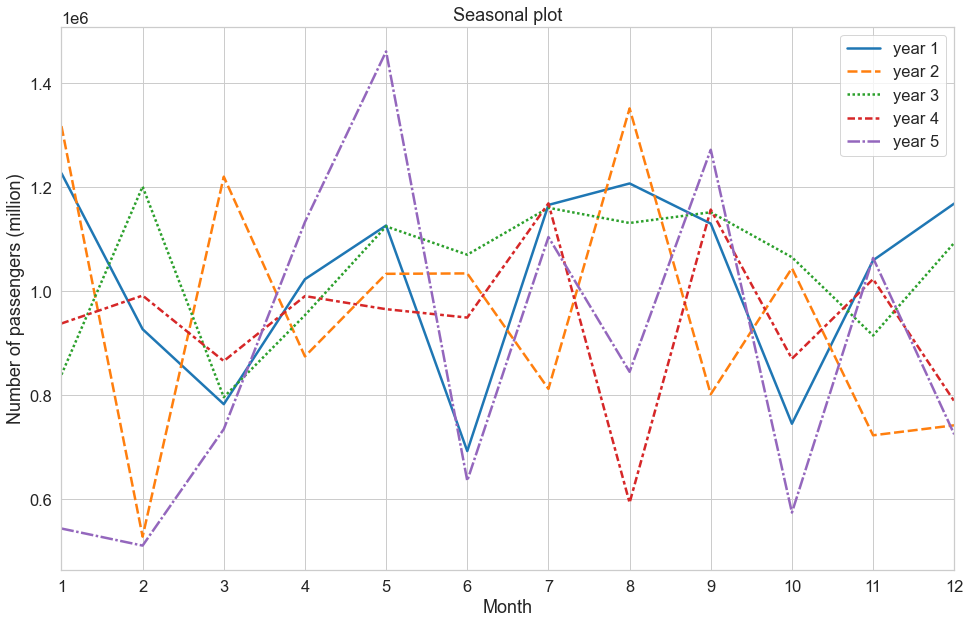

In [102]:
seasonal_plot = df_seasonal.astype(float).copy().transpose()
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(data=seasonal_plot)
ax.set(xlabel='Month', ylabel = 'Number of passengers (million)')
ax.set_title('Seasonal plot')
ax.set_xlim(1,12)
ax.set_xticks(np.arange(1, 12 + 1, 1))
plt.plot()

In [103]:
import plotly.graph_objects as go


categories = list(df_seasonal.columns)
categories = [*categories, categories[0]]
categories = [str(i) for i in categories]

print(type(categories))
year_1 = list(df_seasonal.iloc[0,:])
year_2 = list(df_seasonal.iloc[1,:])
year_3 = list(df_seasonal.iloc[2,:])
year_4 = list(df_seasonal.iloc[3,:])
year_5 = list(df_seasonal.iloc[4,:])

year_1 = [*year_1, year_1[0]]
year_2 = [*year_2, year_2[0]]
year_3 = [*year_3, year_3[0]]
year_4 = [*year_4, year_4[0]]
year_5 = [*year_5, year_5[0]]
#print(categories)
#print(year_1)

fig = go.Figure(
    data=[
        go.Scatterpolar(r=year_1, theta=categories, name='Year 1'),
        go.Scatterpolar(r=year_2, theta=categories, name='Year 2'),
        go.Scatterpolar(r=year_3, theta=categories, name='Year 3'),
        go.Scatterpolar(r=year_4, theta=categories, name='Year 4'),
        go.Scatterpolar(r=year_5, theta=categories, name='Year 5')
    ],
    layout=go.Layout(
       title=go.layout.Title(text='Polar seasonal plot'),
        polar={'radialaxis': {'visible': True},'bgcolor':'PapayaWhip'},
        showlegend=True,
        width=750,
        height=750,
        font=dict(
        size=18,
        )
    )
)

fig.show()

<class 'list'>


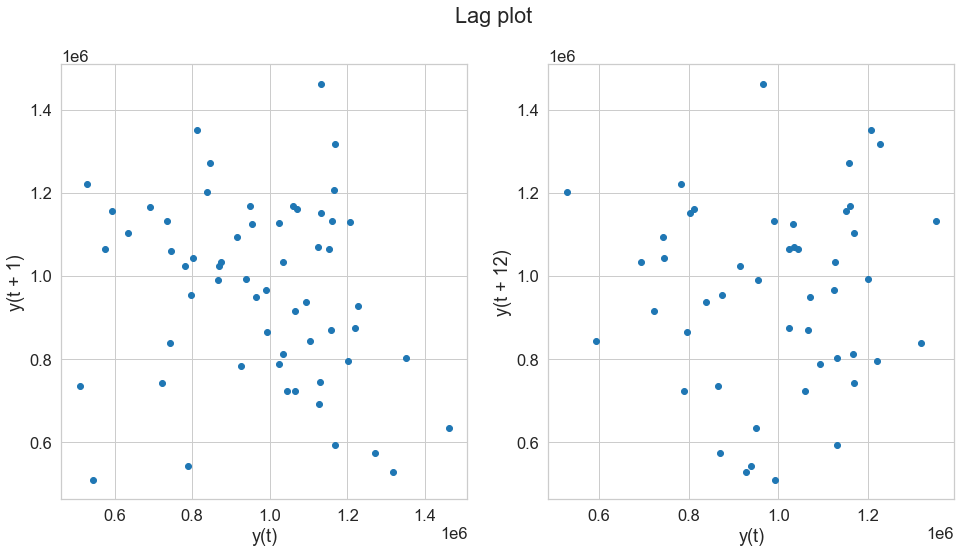

In [106]:
fig_lag = plt.figure(figsize=(16, 8))
#fig, ax = plt.subplots(1, 2, figsize=(12, 7))
#ax[0].set_xlabel('Time')
#ax[0].set_ylabel('Amplitude')
#ax[0].axhline(y=0, color='k')
fig_lag.suptitle('Lag plot')
plt.subplot(121)
pd.plotting.lag_plot(df_date['passenger_count'], lag= 1)
plt.subplot(122)
pd.plotting.lag_plot(df_date['passenger_count'], lag= 12)
plt.show()

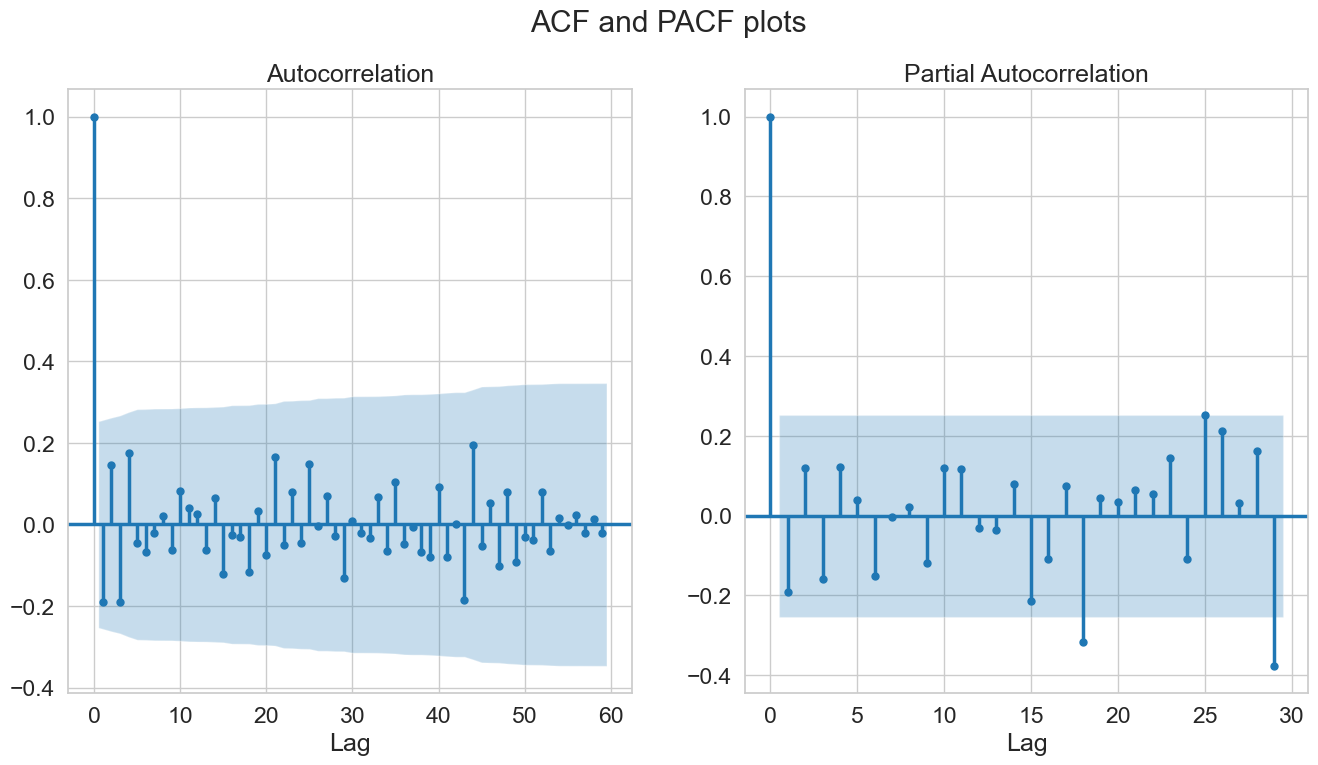

In [107]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig_auto, axes = plt.subplots(1,2,figsize=(16,8), dpi= 100)
fig_auto.suptitle('ACF and PACF plots')
plot_acf(df_date['passenger_count'], lags=59, ax=axes[0])
axes[0].set_xlabel('Lag')
plot_pacf(df_date['passenger_count'], lags=29, ax=axes[1])
axes[1].set_xlabel('Lag')
plt.show()

## Data modelling and forecasting

After the exploratory analysis of the dataset, in which we concluded that the time series is white noise, we can now try to create a model to forecast the passenger counts for the next months.

First we split our dataset in training and testing sets. We will use the first 4 years as the training set and the 5th year as the testing set.

We start with a simple average forecast. In this method, "the forecasts of all future values are equal to the average (or “mean”) of the historical data" (HYNDMAN; ATHANASOPOULOS, 2018). We verify that, as the mean absolute scaled error (MASE) is greater than 1, **the average forecast actually performs worse than the naive method** and, therefore, does not adds value.

The results of the exploratory analysis indicated that the time series is white noise, and, therefore, is stationary, i.e., its properties does not depend on the time at which the series is observed. Before continuing, let's check this using two tests: 

1. Augmented Dickey Fuller test (ADH Test)
2. Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)

In the ADF test, the null hypothesis is that the time series possesses a unit root and is non-stationary. So, if the p-value is less than the significance level (0.05), you reject the null hypothesis.

The KPSS test, on the other hand, is used to test for trend stationarity. The null hypothesis and the p-value interpretation is just the opposite of ADH test. So, the time series is stationary if the null hypothesis is valid (p-value > 0.05).

The tests confirm that the data series is stationary. The p-value is 6.73e-05 for the ADF test, rejecting the null hyposthesis of non-stationarity, and is 0.10 for the KPSS test, confirming the null hypothesis of stationarity.

Given that our time series is stationary, , we can try some ARIMA models. First, we use an autoregressive model, where "we forecast the variable of interest using a linear combination of past values of the variable" (HYNDMAN; ATHANASOPOULOS, 2018). We see that the autoregressive model performs better than the average forecast. However, once more MASE is greater than 1, **so the autoregressive model also performs worse than the naive method**.

In [147]:
df_train_test = df_date.copy()

train_set = df_date.iloc[:48]
test_set = df_date.iloc[48:60,:]
print(train_set.head())
print(test_set.head())

        Month  passenger_count
1  2000-01-01          1226800
2  2000-02-01           926891
3  2000-03-01           782725
4  2000-04-01          1023038
5  2000-05-01          1126293
         Month  passenger_count
49  2004-01-01           543605
50  2004-02-01           510786
51  2004-03-01           734714
52  2004-04-01          1133025
53  2004-05-01          1461091


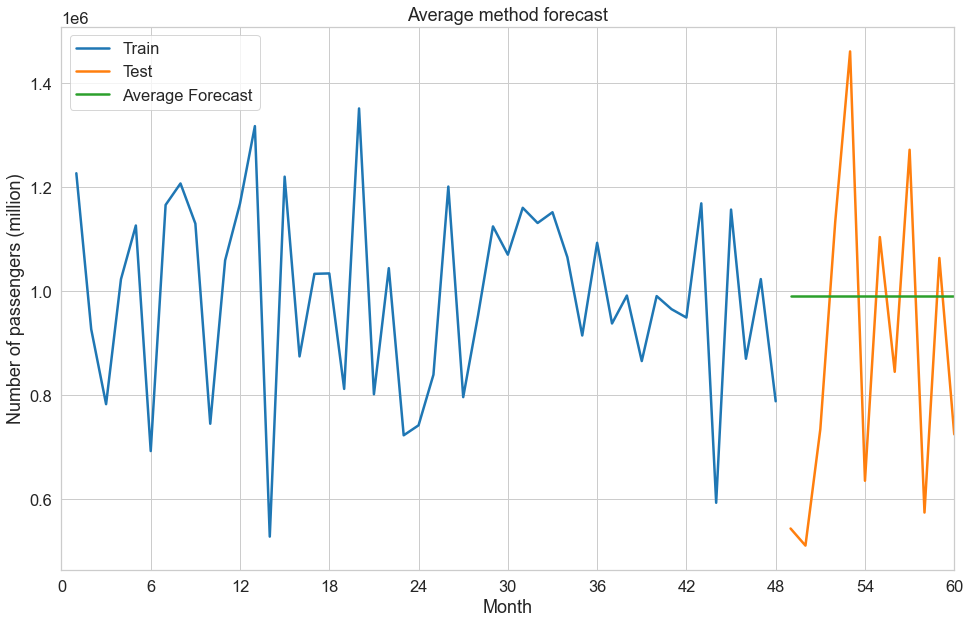

In [254]:
y_hat_avg = test_set.copy()
y_hat_avg['avg_forecast'] = train_set['passenger_count'].mean()

plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(data=train_set['passenger_count'])
ax.set(xlabel='Month', ylabel = 'Number of passengers (million)')
ax.set_title('Average method forecast')
ax.set_xlim(1,60)
ax.set_xticks(np.arange(0, 60 + 1, 6))
bx = sns.lineplot(data=test_set['passenger_count'])
cx = sns.lineplot(data=y_hat_avg['avg_forecast'])
plt.legend(labels=["Train","Test","Average Forecast"])

In [261]:
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_absolute_percentage_error

def MASE_func(training_series, testing_series, prediction_series):

    n = training_series.shape[0]
    d = np.abs(  np.diff( training_series) ).sum()/(n-1)
    
    errors = np.abs(testing_series - prediction_series )
    return errors.mean()/d

MAE = median_absolute_error(test_set['passenger_count'], y_hat_avg['avg_forecast'])
RMSE = mean_squared_error(test_set['passenger_count'], y_hat_avg['avg_forecast'])
MAPE = mean_absolute_percentage_error(test_set['passenger_count'], y_hat_avg['avg_forecast'])
MASE = MASE_func(train_set['passenger_count'],test_set['passenger_count'],y_hat_avg['avg_forecast'])
print('MAE=',MAE)
print('RMSE=',RMSE)
print('MAPE=',MAPE)
print('MASE=',MASE)

MAE= 273615.0
RMSE= 102115645706.45137
MAPE= 0.3976764078243526
MASE= 1.2283619166150959


In [141]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(df_date['passenger_count'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df_date['passenger_count'], nlags='auto', regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -4.75133053471143
p-value: 6.732637850233903e-05
Critial Values:
   1%, -3.5506699942762414
Critial Values:
   5%, -2.913766394626147
Critial Values:
   10%, -2.5946240473991997

KPSS Statistic: 0.275981
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/Users/leuzinger/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1876: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




In [263]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics

sel = ar_select_order(train_set['passenger_count'], 12, trend='n', old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:        passenger_count   No. Observations:                   48
Model:                     AutoReg(3)   Log Likelihood                -614.820
Method:               Conditional MLE   S.D. of innovations         207673.579
Date:                Wed, 19 May 2021   AIC                             24.665
Time:                        18:52:38   BIC                             24.826
Sample:                             3   HQIC                            24.725
                                   48                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
passenger_count.L1     0.0774      0.136      0.571      0.568      -0.188       0.343
passenger_count.L2     0.5525      0.113      4.902      0.000       0.332       0.773
passenger_count.L3  

/Users/leuzinger/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/leuzinger/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



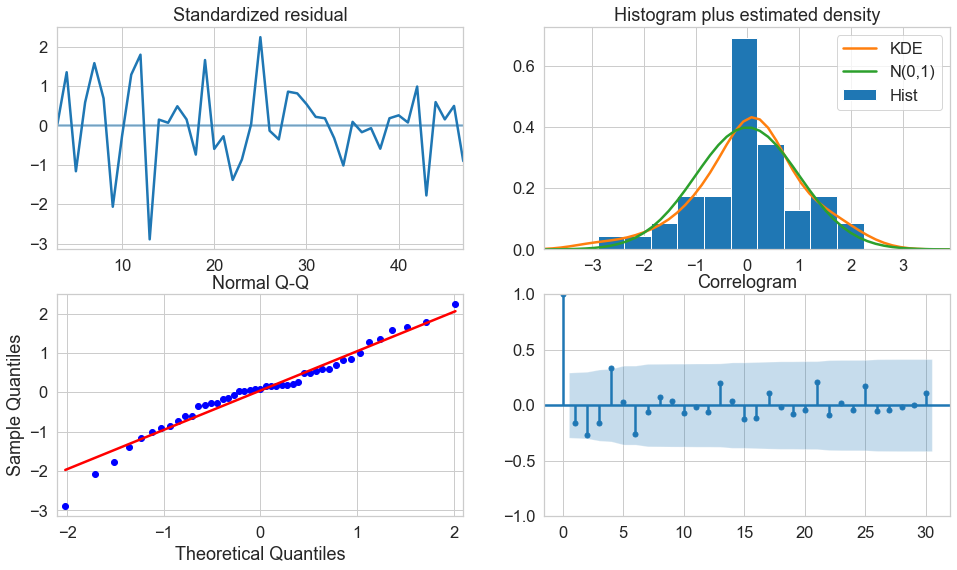

In [264]:
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(lags=30, fig=fig)

/Users/leuzinger/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/Users/leuzinger/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



<Figure size 1152x720 with 0 Axes>

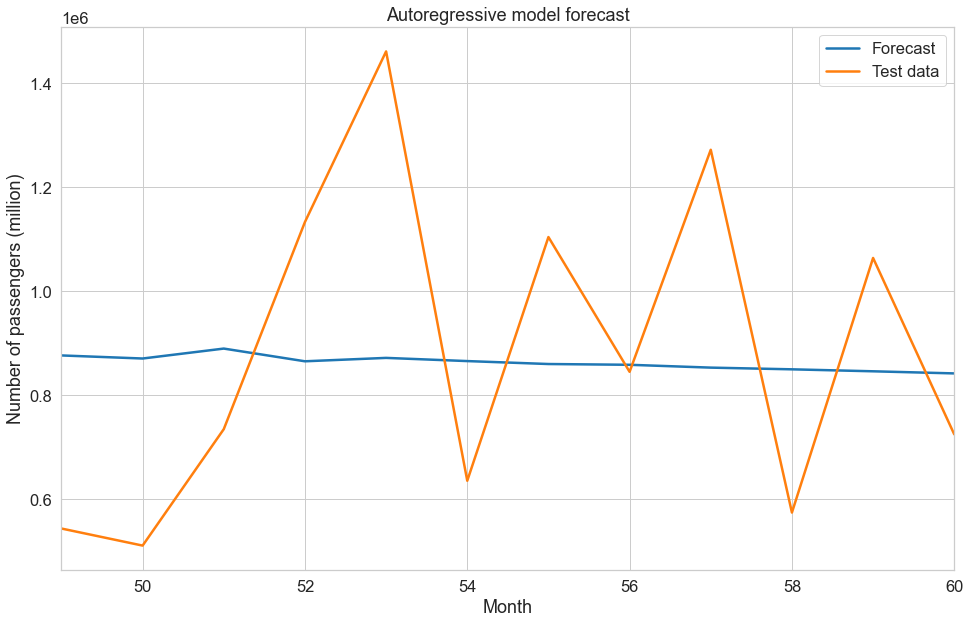

In [268]:
fig = plt.figure(figsize=(16,10))
pred = res.predict(start=len(train_set['passenger_count'])+1, end=(len(df_date)), dynamic=False)
pred1 = res1.predict(start=len(train_set['passenger_count'])+1, end=(len(df_date)), dynamic=False)

plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(data=pred)
ax.set(xlabel='Month', ylabel = 'Number of passengers (million)')
ax.set_title('Autoregressive model forecast')
ax.set_xlim(49,60)
bx = sns.lineplot(data=test_set['passenger_count'])
plt.legend(labels=["Forecast","Test data"])

In [266]:
pred = pred.astype(int)
MAE = median_absolute_error(test_set['passenger_count'], pred)
RMSE = mean_squared_error(test_set['passenger_count'], pred)
MAPE = mean_absolute_percentage_error(test_set['passenger_count'], pred)
MASE = MASE_func(train_set['passenger_count'],test_set['passenger_count'],pred)
print('MAE=',MAE)
print('RMSE=',RMSE)
print('MAPE=',MAPE)
print('MASE=',MASE)

MAE= 256003.0
RMSE= 92387826799.75
MAPE= 0.3284925871253786
MASE= 1.1484056061142014
